# Desarrollo de la PEC 4:
Antes de empezar, se debe abrir la “Tabla resumen de la Práctica 1” del Moodle. Allı́,
encontraréis el valor de los parámetros (T , E) para poder realizar la práctica. Recordar, también,
que debéis indicar los valores utilizados al inicio de la memoria, ası́ como el intento de la Tabla
correspondiente (primero o segundo).

Este cuaderno se corresponde con el **primer intento de la práctica**, cuyos valores de T y E se corresponden 
con los siguientes:

<div style="text-align: center;">
    <div style="border: 1px solid; padding: 10px; width: 100px; text-align: center; display: inline-block;">
        <ul style="list-style-type: disc; margin: 0; padding-left: 20px;">
            <li><i>T</i> = 1</li>
            <li><i>E</i> = 70</li>
        </ul>
    </div>
</div>

In [12]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Paso 1: 
<div style="text-align: center;">
    <i>leer el fichero de datos correspondiente al perı́odo 2006-2008.</i><br>
    <i>De la tabla resultante, guardar la primera columna (weather label ) al vector y y las otras
columnas a la matriz de caracterı́sticas X.</i><br> 
    <i>Responder: ¿qué dimensión tiene la matriz X?</i>
</div>

In [3]:
# Lectura del fichero

# Ruta relativa al conjunto de datos
file_path = "./datasets/data_0608.csv"

# Cargamos el archivo en el dataframe
df = pd.read_csv(file_path)

# Mostramos las primeras filas del dataframe
print(df)

      weather_label  temperature   temp_app  humidity  wind_vel  wind_dir  \
0                 1    16.061111  16.061111      0.58    4.7817       212   
1                 0    13.816667  13.816667      0.31   20.7690       282   
2                 0    12.288889  12.288889      0.42    7.8890       236   
3                 0    21.111111  21.111111      0.38   23.3289       299   
4                 0    12.172222  12.172222      0.32   30.5739       329   
...             ...          ...        ...       ...       ...       ...   
1091              0    23.861111  23.861111      0.36    7.7280       110   
1092              0    22.838889  22.838889      0.37   10.9319        39   
1093              2    23.861111  23.861111      0.29   15.2950        31   
1094              0    26.038889  26.038889      0.24    9.1609       351   
1095              1    21.855556  21.855556      0.45    0.5957       298   

      visibility  atm_pres  
0         9.9015   1024.37  
1        11.4954 

In [32]:
def division_datos(datos):
    """
    Dividimos los datos en las dos matrices que nos pide el ejercicio: Es decir separamos la primera columna en
    una nueva matriz y con el resto de columnas creamos una nueva matriz.
    ---
    Args:
        datos(Dataframe): conjuntos de datos que vamos a dividir.
    Return:
        y: Matriz con los datos de la primera columna
        X: Matriz con el resto de los datos
    """
    # Separamos la primera columna en el vector y el resto de las columnas en la matriz X
    y = df.iloc[:, 0] # Primera columna 
    X = df.iloc[:, 1:] # Todas las columnas excepto la primera

    return y, X

# División en dos tablas
y, X = division_datos(df)


# (Opcional) Mostramos los primeros elementos de X e y
print("Matriz X")
print(X.head())

print("\nMatriz y")
print(y.head())

Matriz X
   temperature   temp_app  humidity  wind_vel  wind_dir  visibility  atm_pres
0    16.061111  16.061111      0.58    4.7817       212      9.9015   1024.37
1    13.816667  13.816667      0.31   20.7690       282     11.4954   1017.78
2    12.288889  12.288889      0.42    7.8890       236      9.9820   1020.96
3    21.111111  21.111111      0.38   23.3289       299      9.9820   1009.09
4    12.172222  12.172222      0.32   30.5739       329     11.2056      0.00

Matriz y
0    1
1    0
2    0
3    0
4    0
Name: weather_label, dtype: int64


In [5]:
# Mostramos las dimensiones de X
print(f"Las dimensiones de X son : {X.shape}")

Las dimensiones de X son : (1096, 7)


## Paso 2: 
Antes de realizar cualquier tipo de análisis, es importante hacer una exploración estadı́stica 
(cuantitativa y cualitativa) de los datos. Para este propósito:
<div style="text-align: center;">
    <i> <b>Observar</b> el número de dı́as con tiempo T</i><br>
    <i> <b>Calcular</b> su temperatura media (sólo de los dı́as correspondientes a T) </i>
</div>

In [42]:
def analisis_T(T, X):
    # Obtenemos los indices de los dias T
    indices_T = y[y==1].index

    # Obtenemos las filas correspondientes en X
    X_T = X.loc[indices_T]

    # Calculamos la temperatura media de los días en que T=1
    temperatura_media = X_T['temperature'].mean()

    # Mostramos los resultados
    # Número de días en los que T=1
    print(f"El número de días lluviosos (T=1) es: {len(indices_T)}")

    # Temperatura media en los días que T es 1
    print(f"La temperatura media en los días que T es igual a 1 es {temperatura_media}")

T = 1

analisis_T(T,X)

El número de días lluviosos (T=1) es: 164
La temperatura media en los días que T es igual a 1 es 6.03658536585366


## Paso 3: 
Para poder aplicar la descomposición en componentes principales, debéis normalizar
la matriz de datos X siguiendo los criterios de la Sección 2.1 de los apuntes del módulo. Para
hacerlo, debéis: 
<div style="text-align: center;">
    <i> <b>Calcular</b> la media y la desviación tı́pica de los datos.</i><br>
    <i> <b>Guardar</b> ambas en las variables m_X y s_X, respectivamente, ya que las necesitaréis más adelante.</i><br>
    <i> <b>Nombrar</b> a la nueva matriz de datos normalizada Xs.</i><br>
    <i> Una vez hecho, <b>Indicar</b> la temperatura media de todo el perı́odo 2006-2008 de los datos normalizados. </i>
</div>

In [189]:
# Calculamos la media y la desviación estándar de cada columna
m_X = X.mean(axis=0) # Media
s_X = X.std(axis=0, ddof=1) # Desviación estándar (ddof=0 para dividir por n)

# Normalizamos la matriz X
Xs = (X - m_X) / s_X

# Calculamos la temperatura media de los datos normalizados
temperatura_media_Xs = Xs['temperature'].mean()

# Mostramos los resultados
print(f"Media de las columnas (m_X) : \n{m_X}")
print(f"Desviación estándar de las columnas (s_X) : \n{s_X}")
print(f"Temperatura media de la matriz normalizada : \n{temperatura_media_Xs}")

Media de las columnas (m_X) : 
temperature     15.484271
temp_app        14.479268
humidity         0.597281
wind_vel        13.641122
wind_dir       187.662409
visibility      10.016609
atm_pres       996.252546
dtype: float64
Desviación estándar de las columnas (s_X) : 
temperature     10.664018
temp_app        11.910165
humidity         0.206462
wind_vel         7.805106
wind_dir       107.202710
visibility       2.757732
atm_pres       146.127179
dtype: float64
Temperatura media de la matriz normalizada : 
-9.724581237592612e-17


## Paso 4: 
Para ver la relación cruzada entre las distintas variables, observar la matriz de covarianza CXs. Dibujarla mediante la instrucción image.plot() de la librerı́a fields y contestar
<div style="text-align: center;">
    <i> ¿Qué variable está más asociada a la visibilidad en valor absoluto (y sin que sea ella misma)?</i><br>
    <i> ¿Qué variable está menos asociada a la visibilidad en valor absoluto?</i>
</div>

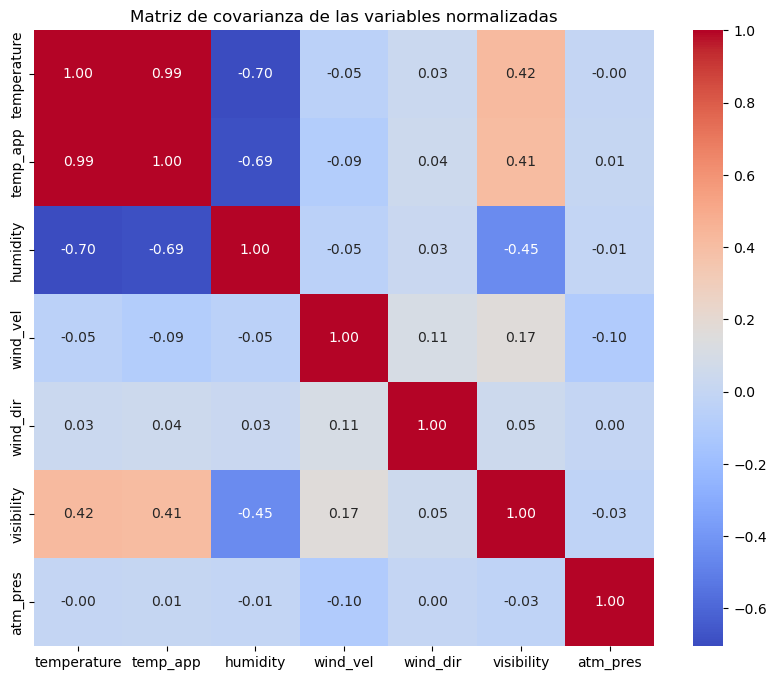

Variable más asociada a la visibilidad: humidity (valor absoluto = -0.450241)
Variable menos asociada a la visibilidad: atm_pres (valor absoluto = -0.025352)


In [36]:
# Calculamos la matriz de covarianza
cov_matriz = np.cov(Xs, rowvar=False)  # rowvar=False asegura que las columnas sean las variables

# Convertimos la matriz de covarianza en un Dataframe para etiquetas claras
cov_df = pd.DataFrame(cov_matriz, columns=Xs.columns, index=Xs.columns)

# Dibujamos el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(cov_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de covarianza de las variables normalizadas")
plt.show()

# Análisis específico de la visibilidad
visibilidad_corr = cov_df['visibility'].drop('visibility', errors='ignore') # Excluimos visibilidad
max_corr = visibilidad_corr.abs().idxmax() # Variable más asociada
min_corr = visibilidad_corr.abs().idxmin() # Variable menos asociada

# Mostramos los resultados
print(f"Variable más asociada a la visibilidad: {max_corr} (valor absoluto = {visibilidad_corr[max_corr]:2f})")
print(f"Variable menos asociada a la visibilidad: {min_corr} (valor absoluto = {visibilidad_corr[min_corr]:2f})")


## Paso 5: 
Seguidamente, 
<div style="text-align: center;">
    <i> <b>calcular</b> la descomposición en componentes principales de la matriz de covarianza CXs.</i><br>
    <i> <b>Dibujar</b> la distribución de la varianza acumulada (eje de ordenadas) para cada componente principal (eje de abscisas) respecto a la varianza total de los datos. </i><br>
    <i> <b>Indicar</b> el número mı́nimo de componentes necesarios P para explicar un E % de la varianza inicial de los datos.</i>
</div>

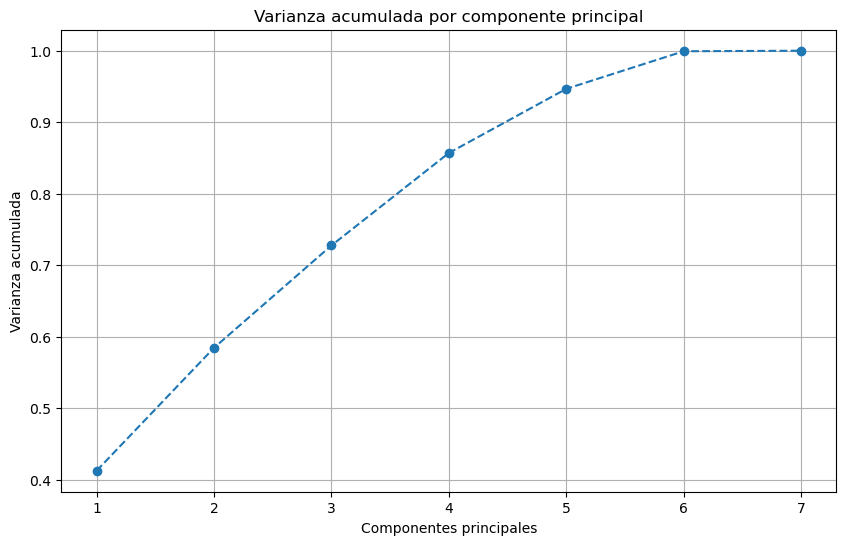

Para explicar al menos el 70.0% de la varianza, se necesita al menos 3 componentes principales


In [35]:
# Calculamos los valores y vectores propios
eigen_values, eigen_vectors = np.linalg.eig(cov_matriz)

# Ordenamos los indices de los valores de mayor a menor y ordenamos los VAPS y VEPS
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

# Calculamos la varianza total explicada y acumulada
total_varianza = np.sum(eigen_values)
explicada_varianza = eigen_values / total_varianza
acumulada_varianza = np.cumsum(explicada_varianza)

# Dibujamos la distribución de la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigen_values) + 1), acumulada_varianza, marker = "o", linestyle="--")
plt.xlabel("Componentes principales")
plt.ylabel("Varianza acumulada")
plt.title("Varianza acumulada por componente principal")
plt.grid()
plt.show()

# Calculamos el mínimo número de componentes principales para explicar E%
E = 0.7
componentes_necesarios = np.argmax(acumulada_varianza >= E) + 1
print(f"Para explicar al menos el {E * 100}% de la varianza, se necesita al menos {componentes_necesarios} componentes principales")



## Paso 6: 
Con el tiempo, se os encarga un nuevo estudio, ahora durante el perı́odo 2009-2011.
Como suposición inicial, considerar una distribución estacionaria de los datos, eso es, que
sus propiedades estadı́sticas son constantes en el tiempo. Esto os permite utilizar la media y
desviación tı́pica anteriormente calculadas ası́ como las componentes principales del perı́odo
2006-2008.
<div style="text-align: center;">
    <i> Empezar <b>leyendo</b> los datos del nuevo perı́odo y <b>normalizarlos</b> usando la media y desviación tı́pica previamente calculadas (apartado 3); </i><br>
    <i> <b>Guardar</b> los datos normalizados a la matriz Xs_test. </i><br>
    <i> <b>Contestar</b>: ¿cuántos dı́as de T habéis observado en este segundo perı́odo?</i>
</div>

In [41]:
# Comprobar porque los resultados son muy raros.
# Cargar los datos del período 2009-2011
file_path2 = "./datasets/data_0911.csv"
data_test = pd.read_csv(file_path2)

# Repetimos la división
y_test, X_test = division_datos(data_test)

# Normalizamos los datos del nuevo período usando
# la media y desviación del anterior dataset
Xs_test = (X_test - m_X)/s_X

# Mostramos los datos normalizados
print("Primera filas de la matriz de testeo normalizada")
print(Xs_test.head())

# Dias cuando T = 1: primera salida
analisis_T(T, X_test)


Primera filas de la matriz de testeo normalizada
   temperature  temp_app  humidity  wind_vel  wind_dir  visibility  atm_pres
0     0.054117  0.132875 -0.083739 -1.135598  0.227128   -0.041760  0.192506
1    -0.156448 -0.055659 -1.392082  0.913650  0.880394    0.536479  0.147387
2    -0.299778 -0.183992 -0.859054 -0.737305  0.451105   -0.012556  0.169159
3     0.527888  0.557076 -1.052882  1.241777  1.039045   -0.012556  0.087891
4    -0.310723 -0.193792 -1.343625  2.170439  1.319016    0.431345 -6.820821
El número de días lluviosos (T=1) es: 164
La temperatura media en los días que T es igual a 1 es 6.03658536585366


## Paso 7: 
Utilizando las P primeras componentes principales calculadas anteriormente:    
<div style="text-align: center;">
    <i> <b>Proyectar</b> los datos del perı́odo 2009-2011 (normalizados) al nuevo subespacio. </i><br>
    <i> <b>Guardar</b> dicha proyección a la variable Xproj_test. Recordar que este subespacio tiene dimensión P .</i><br>
    <i> <b>Responder:</b> ¿qué proporción (en porcentaje) de la varianza inicial de los datos explican los datos del subespacio, 
    Xproj_test? ¿Es mayor o menor que la obtenida en el perı́odo 2006-2008?</i>
</div>

In [55]:
P = componentes_necesarios
vectores_principales = eigen_vectors[:,:P]

Xproj_test = Xs_test @ vectores_principales

explicada_varianza_test = np.sum(eigen_values[:P]/np.sum(eigen_values)*100)

explicada_varianza_original = acumulada_varianza[P-1]*100

# Mostramos los resultados
print(f"La varianza explicada de los datos de testeo para 3 componentes es {explicada_varianza_test:.2f}%")
print(f"La varianza explicada de los datos originales para 3 componentes es {explicada_varianza_original:.2f}%")



La varianza explicada de los datos de testeo para 3 componentes es 72.76%
La varianza explicada de los datos originales para 3 componentes es 72.76%


In [80]:
Xproj_test

,0,1,2
0,0.128972,0.858216,0.306470
1,0.796274,-1.163705,0.637468
2,0.159114,0.378367,0.394802
3,1.155507,-1.192232,0.746619
4,0.595703,-5.117414,-3.922745
...,...,...,...
1091,2.229750,0.451777,-0.464998
1092,2.090202,0.397838,-0.952623
1093,2.385243,0.044144,-1.015333
1094,2.792014,-0.571227,1.125877


## Paso 8: 
Finalmente, a partir de la proyección Xproj_test queréis recuperar los datos observados tal y como se indica 
en la Sección 2.5 y 2.5.1 del documento "Descomposición en vectores singulares.pdf".  y responder:     
<div style="text-align: center;">
    <i> <b>Calcular</b> el error de reconstrucción </i><br>
    <i> <b>Responder:</b> ¿cuál es la desviación tı́pica del error de reconstrucción de la temperatura? </i><br>
    <i> <b>Responder:</b> ¿Creéis que la suposición de una distribución estacionaria de los datos es correcta?</i>
</div>

In [147]:
# Reconstruimos los datos originales desde la proyección
X_reconstruido = Xproj_test @ vectores_principales.T

# Convertimos Xs_test a numpy array
Xs_test_values = Xs_test.values

# Calcular el error de reconstrucción
err_construccion = Xs_test_values - X_reconstruido  # Error en el espacio normalizado

# Extraemos directamente la columna correspondiente al índice de 'temperature'
err_temperature = err_construccion[0]  # Índice conocido de 'temperature'

# Calculamos la desviación estándar del error para 'temperature'
std_error_temperature = np.std(err_temperature, ddof=0)

# Mostrar el resultado
print(f"La desviación típica del error de la temperatura es: {std_error_temperature:.4f}")


La desviación típica del error de la temperatura es: 0.2945


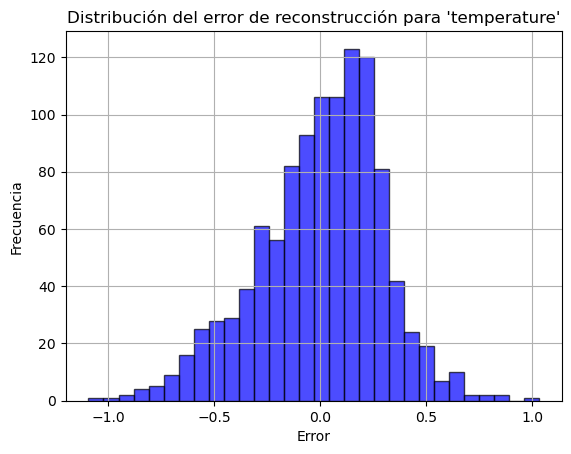

In [148]:
import matplotlib.pyplot as plt

plt.hist(err_temperature, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribución del error de reconstrucción para 'temperature'")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()



In [187]:
# Reconstrucción de los datos originales 
Xs_rec = Xproj_test @ vectores_principales.T 

# Desnormalizamos los datos reconstruidos
X_rec = (Xs_rec * s_X.values) + m_X.values

# Asignar los nombres de las columnas de X_test a X_rec
X_rec = pd.DataFrame(np.array(X_rec), columns=list(X_test.columns), index=X_test.index)

# Calculamos el error de reconstrucción
E = X_test - X_rec

# Error de la temperatura
err_temp = E.loc[:, 'temperature']

# Desviación estándar del error en la temperatura
std_err_temp = np.std(err_temp)

# Representación por consola del resultado anterior por consolaç
print(f"La desviación estándar del error en la temperatura es {std_error_temperature}")




La desviación estándar del error en la temperatura es 0.29449472668120696


In [156]:
# Asignar los nombres de las columnas de X_test a X_rec
X_rec = pd.DataFrame(X_rec, columns=X_test.columns, index=X_test.index)

# Recalcular el error
E = X_test - X_rec

# Verificar si hay valores faltantes en E después de la corrección
print("Valores faltantes en E después de la corrección:", np.any(pd.isna(E)))

# Mostrar los primeros valores del error para confirmar
print(E.head())




Valores faltantes en E después de la corrección: True
   temperature  temp_app  humidity  wind_vel  wind_dir  visibility  atm_pres
0          NaN       NaN       NaN       NaN       NaN         NaN       NaN
1          NaN       NaN       NaN       NaN       NaN         NaN       NaN
2          NaN       NaN       NaN       NaN       NaN         NaN       NaN
3          NaN       NaN       NaN       NaN       NaN         NaN       NaN
4          NaN       NaN       NaN       NaN       NaN         NaN       NaN


In [179]:
X_rec = pd.DataFrame(np.array(X_rec), columns=list(X_test.columns), index=X_test.index)
X_rec




,temperature,temp_app,humidity,wind_vel,wind_dir,visibility,atm_pres
0,17.174652,16.653368,0.587492,8.667707,173.093082,9.438066,1078.541587
1,19.045329,18.179580,0.523077,20.348525,290.610720,11.746788,991.846345
2,16.855605,16.171437,0.585449,11.433058,201.382615,9.856577,1058.979269
3,21.161954,20.533717,0.487529,20.521617,301.211464,12.128391,1001.225239
4,13.394414,10.049458,0.492017,43.523925,117.954276,14.904387,291.906756
...,...,...,...,...,...,...,...
1091,29.207776,29.751375,0.363575,11.173262,137.950464,11.907843,975.480930
1092,28.287853,28.641202,0.372320,11.516113,102.679912,11.826147,922.602606
1093,29.669070,30.057838,0.341416,13.577184,114.494787,12.413222,895.125257
1094,31.585930,32.328278,0.324183,16.983048,306.908286,13.258721,1076.623662


¿Valores faltantes en X_rec?: True
   temperature  temp_app  humidity  wind_vel  wind_dir  visibility  atm_pres
0          NaN       NaN       NaN       NaN       NaN         NaN       NaN
1          NaN       NaN       NaN       NaN       NaN         NaN       NaN
2          NaN       NaN       NaN       NaN       NaN         NaN       NaN
3          NaN       NaN       NaN       NaN       NaN         NaN       NaN
4          NaN       NaN       NaN       NaN       NaN         NaN       NaN


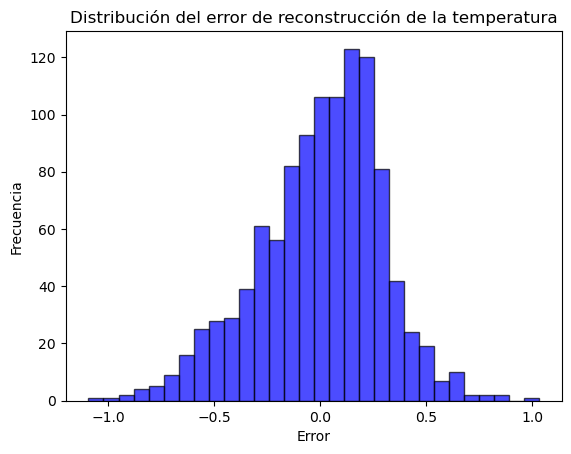

In [188]:
# Reconstrucción de los datos originales 
Xs_rec = Xproj_test @ vectores_principales.T 

# Desnormalizamos los datos reconstruidos
X_rec = (Xs_rec * s_X.values) + m_X.values

# Convertimos a DataFrame con las columnas correctas
X_rec = pd.DataFrame(X_rec, columns=list(X_test.columns), index=X_test.index)

# Verificamos si los valores son correctos
print("¿Valores faltantes en X_rec?:", X_rec.isna().any().any())
print(X_rec.head())

# Hstograma del error en la temperatura
plt.hist(err_temperature, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribución del error de reconstrucción de la temperatura')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()